### 그래프 연습문제

``` # 1. Tips 데이터```

In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

# path = 'C:\Users\YONSAI\.matplotlib'
# fm.fontManger.addfont(path+)
# plt.rcParams['font.family']

In [7]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [8]:
# 팁비율
tips['tip_pct'] = ((tips.tip) / (tips.total_bill) *100).round(2)
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,5.94
1,10.34,1.66,Male,No,Sun,Dinner,3,16.05


In [9]:
#요일별 팁의 비율(bar)
date = tips.pivot_table('tip_pct', 'day')
date

,tip_pct
day,
Thur,16.126452
Fri,16.991579
Sat,15.314598
Sun,16.689605


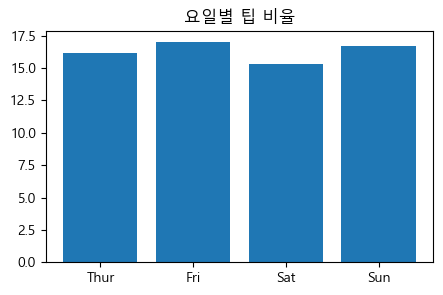

In [10]:
plt.figure(figsize=(5,3))
plt.bar(date.index, date.tip_pct)
plt.title('요일별 팁 비율')
plt.show()

In [11]:
#인원수별 팁의 비율(bar)
person = tips.pivot_table('tip_pct', 'size')
person

,tip_pct
size,
1,21.727500
2,16.571410
3,15.214737
4,14.594865
5,14.152000
6,15.620000


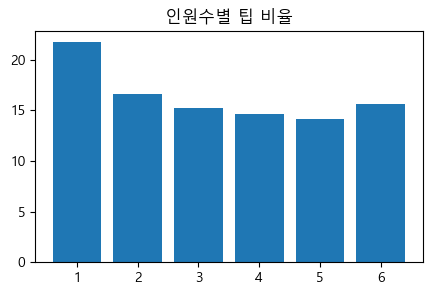

In [12]:
plt.figure(figsize=(5,3))
plt.bar(person.index, person.tip_pct)
plt.title('인원수별 팁 비율')
plt.show()

``` # 2. Anscombe 데이터```

In [13]:

#2) Anscombe 데이터
#4개 DataSet에 대해, 산포도 + 회귀식 그래프


In [14]:
import seaborn as sns
ans =sns.load_dataset('anscombe')
ans.dataset.value_counts()  # 데이터 정보 확인

dataset
I      11
II     11
III    11
IV     11
Name: count, dtype: int64

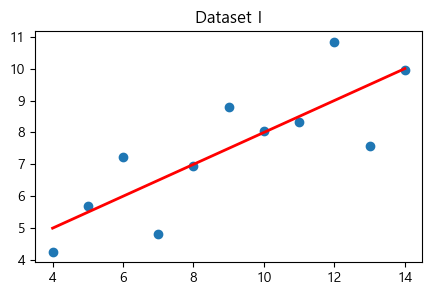

In [15]:
ds = ans[ans.dataset == 'I']
plt.figure(figsize=(5,3))
plt.scatter(ds.x, ds.y, marker='o')

# 직선의 방정식_그래프로 그릴 땐 [x1, x2],[y1, y2] 값으로 묶어줌
plt.plot([4,14], [5,10], 'r-', lw=2)     # y = 0.5 *x + 3

plt.title('Dataset I')
plt.show()

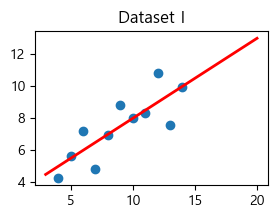

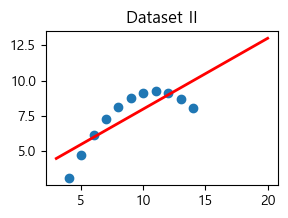

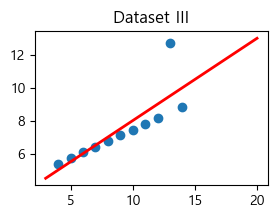

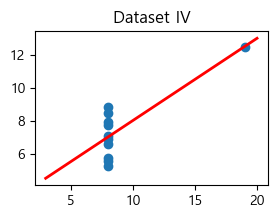

In [16]:
for roman in ['I','II','III','IV']:
    ds = ans[ans.dataset == roman]
    plt.figure(figsize=(3,2))
    plt.scatter(ds.x, ds.y, marker='o')

    # 그래프 범위를 넓힘(x,y값 조정) [3,14],[5,10]에서
    plt.plot([3,20], [4.5,13], 'r-', lw=2)     # y = 0.5 *x + 3
    plt.title(f'Dataset {roman}')
    plt.show()

```# 3) 서울시 구별 cctv 댓수```

In [17]:
#3) 파일 가져오기
filename = 'data/서울시 자치구 년도별 CCTV 설치 현황_221231기준.csv'
columns = '구분,총계'.split(',')
cctv = pd.read_csv(filename, encoding='euc-kr', thousands=',')
cctv= cctv[columns]
cctv.head()

# barh 사용

# 기본순서: index를 sort(오름) / value를 sort(내림)

,구분,총계
0,계,91341
1,종로구,1980
2,중 구,2584
3,용산구,2847
4,성동구,4047


In [18]:
cctv.drop([0], inplace=True)
cctv.set_index('구분', inplace=True)
cctv.head()

,총계
구분,
종로구,1980
중 구,2584
용산구,2847
성동구,4047
광진구,3480


Text(0.5, 1.0, '자치구별 CCTV 설치 수')

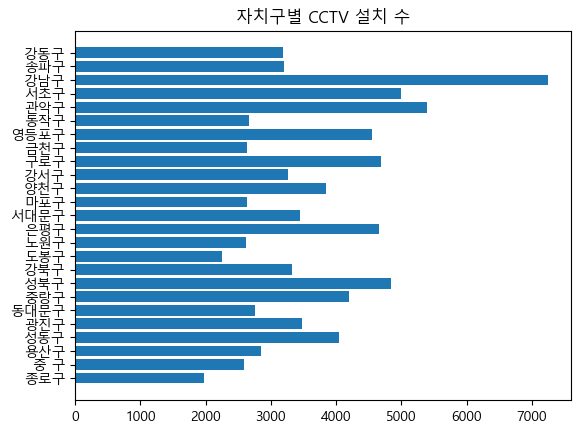

In [19]:
# 1. Unsorted_# barh 사용해서 차트만듦
plt.barh(cctv.index, cctv.총계)
plt.title('자치구별 CCTV 설치 수')


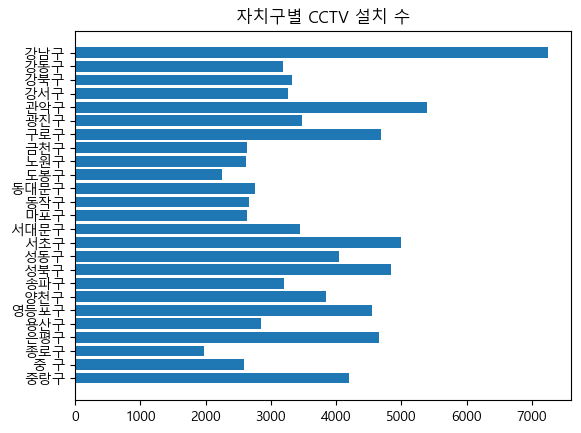

In [20]:
#index 기준으로 정렬
si = cctv.총계.sort_index(ascending=False)  # 오름차순 -강남구 부터
plt.barh(si.index, si.values)
plt.title('자치구별 CCTV 설치 수')
plt.show()

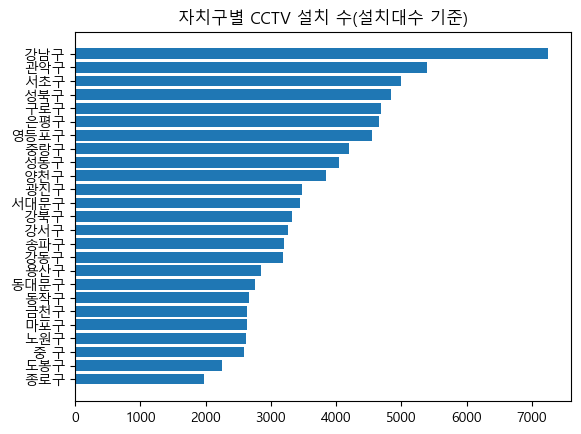

In [21]:
# value 기준으로 정렬
sv = cctv.총계.sort_values()    # 내림차순-큰 값부터
plt.barh(sv.index, sv.values)
plt.title('자치구별 CCTV 설치 수(설치대수 기준)')
plt.show()